In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 

In [3]:
main = pd.read_csv('main.tsv', sep='\t', header=0)

In [4]:
main.head()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,impressions
0,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,"1,5695234,1,4.0,250.0,2.0,1,0,3,0,0|2,1734546,..."
1,002ba2a7c74dbffc32e4568af230d49a,25b8ebecb15b8f3edb5eed36a1f699b4,2021-06-23T03:39:00.000Z,1,1,0,50,2021-09-10,2021-09-14,2,0,0,1,PRICE ASCENDING,NaN,"1,5151135,0,null,null,null,1,1,1,0,0"
2,00c5152ed6ef5b937e8320a260bde084,349c86ff1be41553878e01988ca209d1,2021-06-10T00:08:00.000Z,1,1,0,49,2021-07-07,2021-07-12,2,0,0,1,RECOMMENDED,NaN,"1,1624072,0,4.0,1250.0,4.0,1,1,2,1,0|2,5170759..."
3,00d5e2bca7962f67d5695e7e7b92feb8,d3b41f5d906b3f5e56bcafd4a7428634,2021-07-16T01:08:00.000Z,12,1,0,13,2021-08-25,2021-08-28,2,0,0,1,RECOMMENDED,NaN,"1,2391667,1,4.0,1625.0,5.0,0,0,5,0,0|2,4930059..."
4,013f92616fe583c4ba0c3919b69cf3d9,a359fd984e5ae5be64af5226dd1e9fe2,2021-07-07T20:49:00.000Z,1,1,0,206,2021-08-30,2021-09-04,1,0,0,1,RECOMMENDED,VIPONLY:FALSE,"1,6714720,1,5.0,225.0,3.0,1,0,5,0,0|2,5593294,..."


In [5]:
main['point_of_sale'].value_counts()

1      1507036
2       197165
3       160869
4       111747
5        83507
        ...   
164          1
163          1
162          1
161          1
179          1
Name: point_of_sale, Length: 179, dtype: int64

In [6]:
main.dtypes

user_id                 object
search_id               object
search_timestamp        object
point_of_sale            int64
geo_location_country     int64
is_mobile                int64
destination_id           int64
checkin_date            object
checkout_date           object
adult_count              int64
child_count              int64
infant_count             int64
room_count               int64
sort_type               object
applied_filters         object
impressions             object
dtype: object

New Column containing number of hotels that came up after the search

In [7]:
main['hotels_illustrated'] = main['impressions'].str.count(',')/10

In [8]:
main['hotels_illustrated'] = main['hotels_illustrated'].astype(int)

In [9]:
main['hotels_illustrated']

0          100
1            1
2          100
3          100
4          100
          ... 
2577804    100
2577805      2
2577806    100
2577807      1
2577808    100
Name: hotels_illustrated, Length: 2577809, dtype: int32

In [10]:
main

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,impressions,hotels_illustrated
0,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,"1,5695234,1,4.0,250.0,2.0,1,0,3,0,0|2,1734546,...",100
1,002ba2a7c74dbffc32e4568af230d49a,25b8ebecb15b8f3edb5eed36a1f699b4,2021-06-23T03:39:00.000Z,1,1,0,50,2021-09-10,2021-09-14,2,0,0,1,PRICE ASCENDING,NaN,"1,5151135,0,null,null,null,1,1,1,0,0",1
2,00c5152ed6ef5b937e8320a260bde084,349c86ff1be41553878e01988ca209d1,2021-06-10T00:08:00.000Z,1,1,0,49,2021-07-07,2021-07-12,2,0,0,1,RECOMMENDED,NaN,"1,1624072,0,4.0,1250.0,4.0,1,1,2,1,0|2,5170759...",100
3,00d5e2bca7962f67d5695e7e7b92feb8,d3b41f5d906b3f5e56bcafd4a7428634,2021-07-16T01:08:00.000Z,12,1,0,13,2021-08-25,2021-08-28,2,0,0,1,RECOMMENDED,NaN,"1,2391667,1,4.0,1625.0,5.0,0,0,5,0,0|2,4930059...",100
4,013f92616fe583c4ba0c3919b69cf3d9,a359fd984e5ae5be64af5226dd1e9fe2,2021-07-07T20:49:00.000Z,1,1,0,206,2021-08-30,2021-09-04,1,0,0,1,RECOMMENDED,VIPONLY:FALSE,"1,6714720,1,5.0,225.0,3.0,1,0,5,0,0|2,5593294,...",100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577804,ffde5a54ea8f3b225f5ed82801bc8e04,f4ab1530a53c82976072dec5c80ee30f,2021-06-18T19:23:00.000Z,1,1,1,85,2021-07-01,2021-07-04,2,0,0,1,RECOMMENDED,NaN,"1,379138,0,5.0,1325.0,4.0,1,1,2,0,0|2,2139996,...",100
2577805,ffde5a54ea8f3b225f5ed82801bc8e04,7defa5f7f28e8a42b970c7867a7fbab7,2021-06-18T19:24:00.000Z,1,1,1,85,2021-07-01,2021-07-04,2,0,0,1,RECOMMENDED,PRICE:1,"1,5828015,0,3.0,650.0,2.0,1,0,2,0,0|2,1111866,...",2
2577806,ffde5a54ea8f3b225f5ed82801bc8e04,0e2ffe5983f425ee8edeaa5c431e5e90,2021-06-18T19:24:00.000Z,1,1,1,85,2021-07-01,2021-07-04,2,0,0,1,RECOMMENDED,NaN,"1,379138,0,5.0,1325.0,4.0,1,1,2,0,0|2,2139996,...",100
2577807,ffdfca5abb43a1931980abac7101aa59,ab879b951d96cb973417b3c76a83f764,2021-07-14T23:21:00.000Z,21,33,0,8249,2021-09-14,2021-09-18,2,0,0,1,PRICE ASCENDING,NaN,"1,5233550,0,null,null,null,1,1,1,0,0",1


In [11]:
main['hotels_illustrated'].value_counts()

100    1397543
50      297711
1       165405
2        24753
3        23039
        ...   
56        4723
57        4706
52        4633
53        4610
51        4429
Name: hotels_illustrated, Length: 100, dtype: int64

Encoding Searches and users to simpler ones

In [12]:
main['user_id'].nunique()

812638

In [13]:
main['user_id'] = pd.Categorical(main['user_id']).codes

In [14]:
main['search_id'] = pd.Categorical(main['search_id']).codes

In [15]:
main.dtypes

user_id                  int32
search_id                int32
search_timestamp        object
point_of_sale            int64
geo_location_country     int64
is_mobile                int64
destination_id           int64
checkin_date            object
checkout_date           object
adult_count              int64
child_count              int64
infant_count             int64
room_count               int64
sort_type               object
applied_filters         object
impressions             object
hotels_illustrated       int32
dtype: object

Transforming some integers to strings since the do not have quantity meaning

In [16]:
main['user_id'] = main['user_id'].astype('str')
main['search_id'] = main['search_id'].astype('str')
main['point_of_sale'] = main['point_of_sale'].astype('str')
main['geo_location_country'] = main['geo_location_country'].astype('str')
main['destination_id'] = main['destination_id'].astype('str')

In [17]:
main.dtypes

user_id                 object
search_id               object
search_timestamp        object
point_of_sale           object
geo_location_country    object
is_mobile                int64
destination_id          object
checkin_date            object
checkout_date           object
adult_count              int64
child_count              int64
infant_count             int64
room_count               int64
sort_type               object
applied_filters         object
impressions             object
hotels_illustrated       int32
dtype: object

New column revealing whether it is a family search or not

In [18]:
main['family'] =[main['child_count'][x] + main['infant_count'][x] > 0 for x in  main.index.tolist()]

In [19]:
main

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,impressions,hotels_illustrated,family
0,329,846497,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,"1,5695234,1,4.0,250.0,2.0,1,0,3,0,0|2,1734546,...",100,False
1,529,378945,2021-06-23T03:39:00.000Z,1,1,0,50,2021-09-10,2021-09-14,2,0,0,1,PRICE ASCENDING,NaN,"1,5151135,0,null,null,null,1,1,1,0,0",1,False
2,2493,528785,2021-06-10T00:08:00.000Z,1,1,0,49,2021-07-07,2021-07-12,2,0,0,1,RECOMMENDED,NaN,"1,1624072,0,4.0,1250.0,4.0,1,1,2,1,0|2,5170759...",100,False
3,2717,2129638,2021-07-16T01:08:00.000Z,12,1,0,13,2021-08-25,2021-08-28,2,0,0,1,RECOMMENDED,NaN,"1,2391667,1,4.0,1625.0,5.0,0,0,5,0,0|2,4930059...",100,False
4,4063,1644043,2021-07-07T20:49:00.000Z,1,1,0,206,2021-08-30,2021-09-04,1,0,0,1,RECOMMENDED,VIPONLY:FALSE,"1,6714720,1,5.0,225.0,3.0,1,0,5,0,0|2,5593294,...",100,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577804,812221,2461993,2021-06-18T19:23:00.000Z,1,1,1,85,2021-07-01,2021-07-04,2,0,0,1,RECOMMENDED,NaN,"1,379138,0,5.0,1325.0,4.0,1,1,2,0,0|2,2139996,...",100,False
2577805,812221,1268372,2021-06-18T19:24:00.000Z,1,1,1,85,2021-07-01,2021-07-04,2,0,0,1,RECOMMENDED,PRICE:1,"1,5828015,0,3.0,650.0,2.0,1,0,2,0,0|2,1111866,...",2,False
2577806,812221,142798,2021-06-18T19:24:00.000Z,1,1,1,85,2021-07-01,2021-07-04,2,0,0,1,RECOMMENDED,NaN,"1,379138,0,5.0,1325.0,4.0,1,1,2,0,0|2,2139996,...",100,False
2577807,812244,1725809,2021-07-14T23:21:00.000Z,21,33,0,8249,2021-09-14,2021-09-18,2,0,0,1,PRICE ASCENDING,NaN,"1,5233550,0,null,null,null,1,1,1,0,0",1,False


In [20]:
main['family'].value_counts()

False    2224347
True      353462
Name: family, dtype: int64

In [21]:
main.nunique()

user_id                  812638
search_id               2575929
search_timestamp          83840
point_of_sale               179
geo_location_country        219
is_mobile                     2
destination_id            71026
checkin_date                552
checkout_date               558
adult_count                  40
child_count                  20
infant_count                  4
room_count                    6
sort_type                     8
applied_filters           38914
impressions             2366762
hotels_illustrated          100
family                        2
dtype: int64

In [22]:
main.groupby(['family']).mean()

,is_mobile,adult_count,child_count,infant_count,room_count,hotels_illustrated
family,,,,,,
False,0.430972,1.985407,0.000000,0.000000,1.006124,71.834279
True,0.437566,2.401030,1.883396,0.016502,1.019479,70.061973


In [23]:
main.groupby(['is_mobile']).mean()

,adult_count,child_count,infant_count,room_count,hotels_illustrated,family
is_mobile,,,,,,
0,2.043093,0.252444,0.001609,1.009094,70.496605,0.135744
1,2.041479,0.265879,0.003123,1.006458,73.031268,0.138924


In [24]:
main.groupby(['destination_id']).mean()

,is_mobile,adult_count,child_count,infant_count,room_count,hotels_illustrated,family
destination_id,,,,,,,
1,0.004421,2.000000,0.002391,0.000000,1.000000,99.928341,0.001335
10,0.345277,2.130965,0.288649,0.007619,1.032999,48.794852,0.164994
100,0.395177,2.147413,0.396344,0.000000,1.000000,87.126410,0.201867
1000,0.463277,1.980226,0.285311,0.000000,1.000000,78.262712,0.163842
10000,0.692308,1.923077,0.230769,0.000000,1.000000,57.769231,0.115385
...,...,...,...,...,...,...,...
9995,0.315789,2.421053,0.105263,0.000000,1.000000,79.105263,0.105263
9996,0.086957,2.086957,0.000000,0.000000,1.000000,65.347826,0.000000
9997,0.058824,1.176471,0.000000,0.000000,1.000000,88.352941,0.000000


In [25]:
main.isnull().sum()

user_id                       0
search_id                     0
search_timestamp              0
point_of_sale                 0
geo_location_country          0
is_mobile                     0
destination_id                0
checkin_date                201
checkout_date               201
adult_count                   0
child_count                   0
infant_count                  0
room_count                    0
sort_type                     0
applied_filters         1728645
impressions                   0
hotels_illustrated            0
family                        0
dtype: int64

In [26]:
main['total_people'] = main['adult_count'] +main['child_count'] +main['infant_count']

c:\users\ezet\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\ezet\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


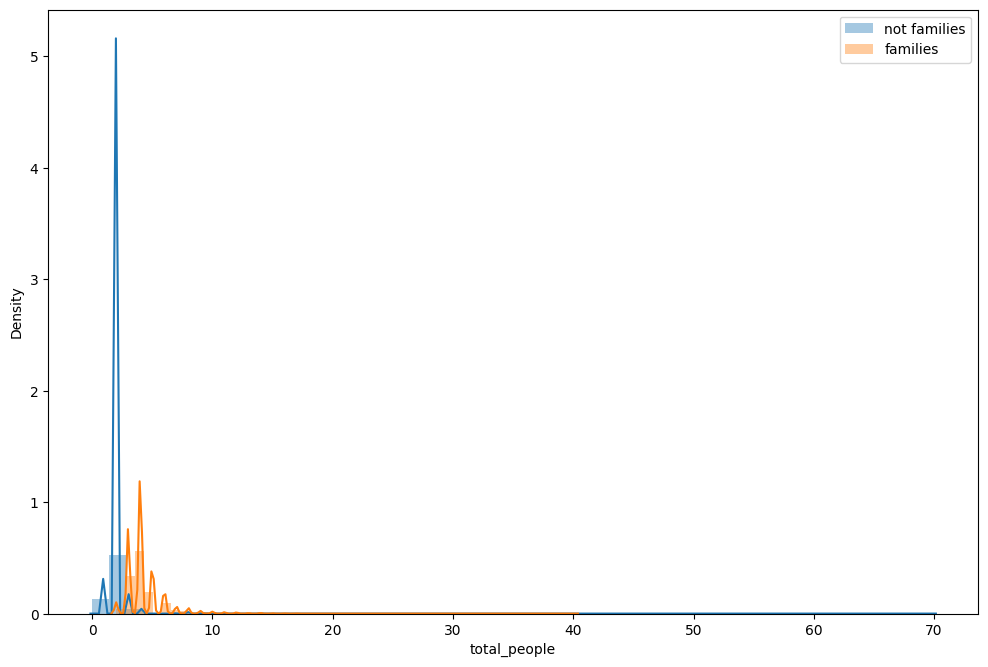

In [27]:
sns.distplot(main[~main['family']]['total_people'], label='not families', color='C0')
sns.distplot(main[main['family']]['total_people'], label='families', color='C1')

plt.legend()

In [28]:
#Maybe creating dummies columned with groups of 1)family/families,3)friends,4)groups,5)individuals

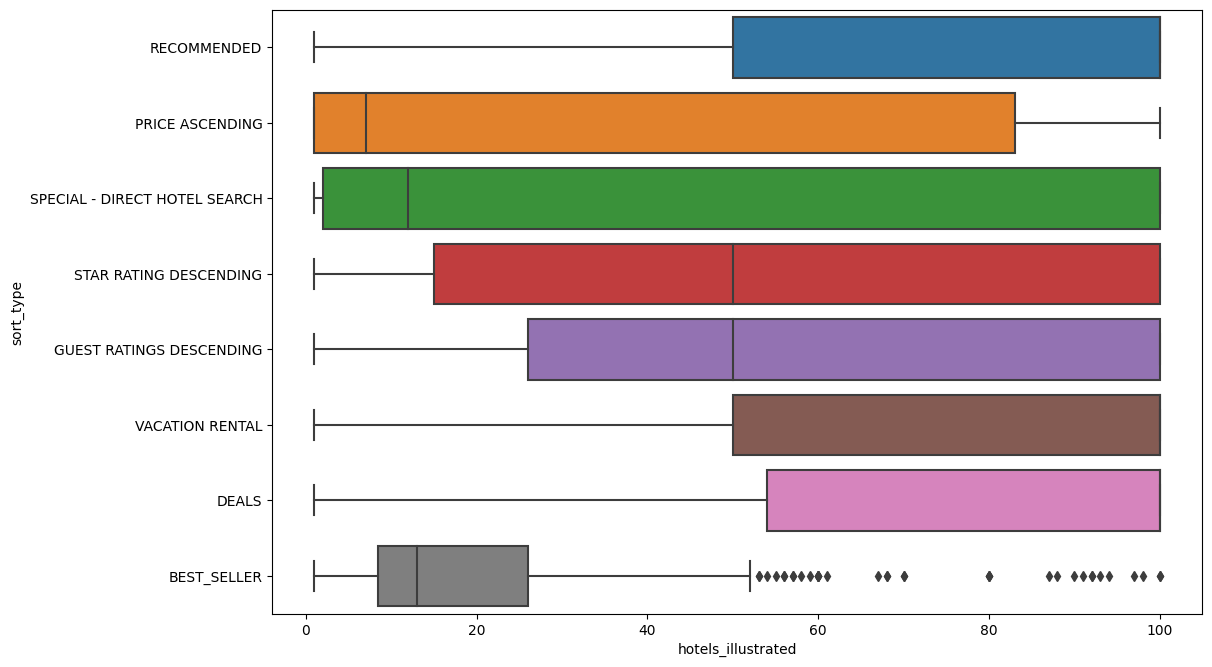

In [29]:
for column in main.select_dtypes(include='object'):
    if main[column].nunique() < 10:
        sns.boxplot(y=column, x='hotels_illustrated', data=main)
plt.show()

In [38]:
main[main['sort_type'] == 'RECOMMENDED']
# Are these the ones I will be based on?

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,impressions,hotels_illustrated,family,total_people
0,329,846497,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,"1,5695234,1,4.0,250.0,2.0,1,0,3,0,0|2,1734546,...",100,False,2
2,2493,528785,2021-06-10T00:08:00.000Z,1,1,0,49,2021-07-07,2021-07-12,2,0,0,1,RECOMMENDED,NaN,"1,1624072,0,4.0,1250.0,4.0,1,1,2,1,0|2,5170759...",100,False,2
3,2717,2129638,2021-07-16T01:08:00.000Z,12,1,0,13,2021-08-25,2021-08-28,2,0,0,1,RECOMMENDED,NaN,"1,2391667,1,4.0,1625.0,5.0,0,0,5,0,0|2,4930059...",100,False,2
4,4063,1644043,2021-07-07T20:49:00.000Z,1,1,0,206,2021-08-30,2021-09-04,1,0,0,1,RECOMMENDED,VIPONLY:FALSE,"1,6714720,1,5.0,225.0,3.0,1,0,5,0,0|2,5593294,...",100,False,1
5,4281,2057829,2021-06-10T14:49:00.000Z,2,1,1,9,2021-06-10,2021-06-11,2,0,0,1,RECOMMENDED,PRICE:0,"1,3894329,0,5.0,1025.0,3.0,0,1,4,0,0|2,2785866...",100,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577803,811956,1241721,2021-06-15T12:15:00.000Z,3,2,0,11,2021-07-04,2021-07-06,2,0,0,1,RECOMMENDED,NaN,"1,713602,1,5.0,4750.0,5.0,1,1,4,1,0|2,1465671,...",100,False,2
2577804,812221,2461993,2021-06-18T19:23:00.000Z,1,1,1,85,2021-07-01,2021-07-04,2,0,0,1,RECOMMENDED,NaN,"1,379138,0,5.0,1325.0,4.0,1,1,2,0,0|2,2139996,...",100,False,2
2577805,812221,1268372,2021-06-18T19:24:00.000Z,1,1,1,85,2021-07-01,2021-07-04,2,0,0,1,RECOMMENDED,PRICE:1,"1,5828015,0,3.0,650.0,2.0,1,0,2,0,0|2,1111866,...",2,False,2
2577806,812221,142798,2021-06-18T19:24:00.000Z,1,1,1,85,2021-07-01,2021-07-04,2,0,0,1,RECOMMENDED,NaN,"1,379138,0,5.0,1325.0,4.0,1,1,2,0,0|2,2139996,...",100,False,2
